In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df['Genre'] = df['Genre'].replace('Male',0)
df['Genre'] = df['Genre'].replace('Female',1)

/tmp/ipython-input-17-1171171958.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df['Genre'].replace('Female',1)


In [34]:
features = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = df[features]

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Without standardizing, Annual Income and Spending Score will dominate the PCA simply because they have larger numbers, even if they're not more informative.



PCA works by finding the directions (components) in which the data varies the most. If your features (columns) are on very different scales, PCA will bias toward those with larger values, not necessarily more important ones.

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

print (pca.explained_variance_ratio_)

[0.33690046 0.26230645]


In [40]:
x_pca.shape

(200, 2)

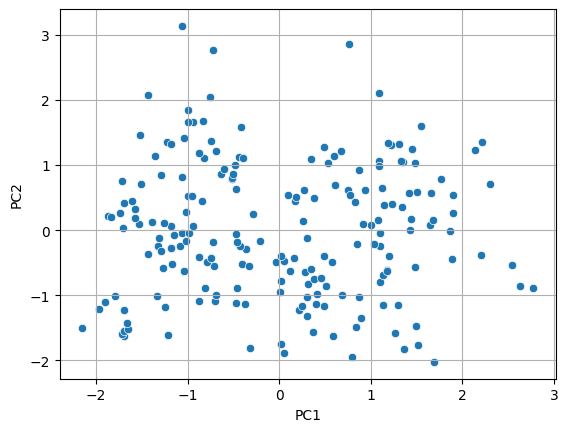

In [42]:
df_pca = pd.DataFrame(x_pca,columns=['PC1','PC2'])
sns.scatterplot(x = 'PC1',y = 'PC2',data = df_pca)
plt.grid(True)

In [43]:
print(pca.explained_variance_ratio_)

[0.33690046 0.26230645]


**This shows that the total variance of pc1 and pc2 is 59%
not much good but acceptable for clustering and visualization**

In [46]:
df_pca


,PC1,PC2,Clusters
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,2
3,-1.694513,-1.631908,2
4,-0.313108,-1.810483,2
...,...,...,...
195,-1.179572,1.324568,1
196,0.672751,1.221061,1
197,-0.723719,2.765010,1
198,0.767096,2.861930,1


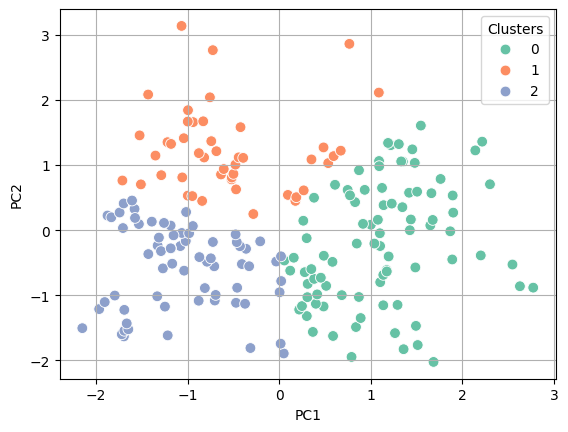

In [51]:
from sklearn.cluster import KMeans


kmeans  = KMeans(n_clusters=3,random_state=42)
clusters  = kmeans.fit_predict(x_pca)


df_pca['Clusters'] = clusters


sns.scatterplot(x = 'PC1',y = 'PC2',hue  = 'Clusters',data = df_pca,s=60,palette = 'Set2')
plt.grid(True)
plt.show()

In [57]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca, labels)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")


Silhouette Score for 2 clusters: 0.401
Silhouette Score for 3 clusters: 0.368
Silhouette Score for 4 clusters: 0.412
Silhouette Score for 5 clusters: 0.404
Silhouette Score for 6 clusters: 0.403


now using 4 clusters as silhouette score was higher for 4 clusters

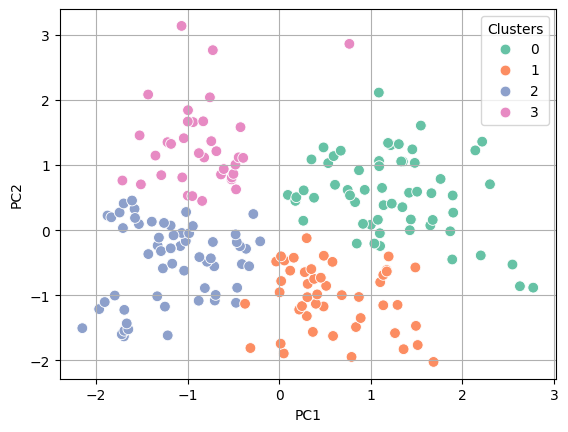

In [58]:
from sklearn.cluster import KMeans


kmeans  = KMeans(n_clusters=4,random_state=42)
clusters  = kmeans.fit_predict(x_pca)


df_pca['Clusters'] = clusters


sns.scatterplot(x = 'PC1',y = 'PC2',hue  = 'Clusters',data = df_pca,s=60,palette = 'Set2')
plt.grid(True)
plt.show()

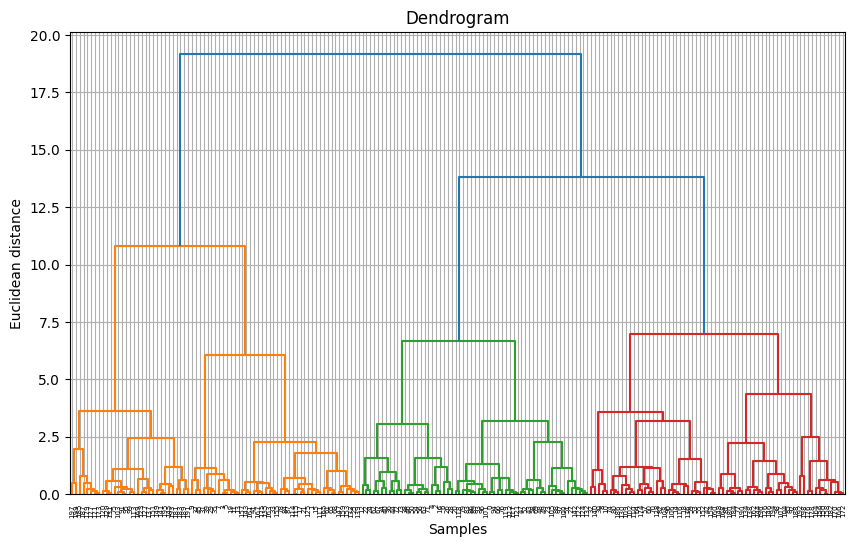

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(x_pca, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distance')
plt.grid(True)
plt.show()


In [67]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(x_pca)

df_pca['Agnes_Cluster'] = labels


In [68]:
df_pca

,PC1,PC2,Clusters,Agnes_Cluster
0,-0.406383,-0.520714,2,0
1,-1.427673,-0.367310,2,1
2,0.050761,-1.894068,1,0
3,-1.694513,-1.631908,2,1
4,-0.313108,-1.810483,1,0
...,...,...,...,...
195,-1.179572,1.324568,3,1
196,0.672751,1.221061,0,0
197,-0.723719,2.765010,3,1
198,0.767096,2.861930,3,0


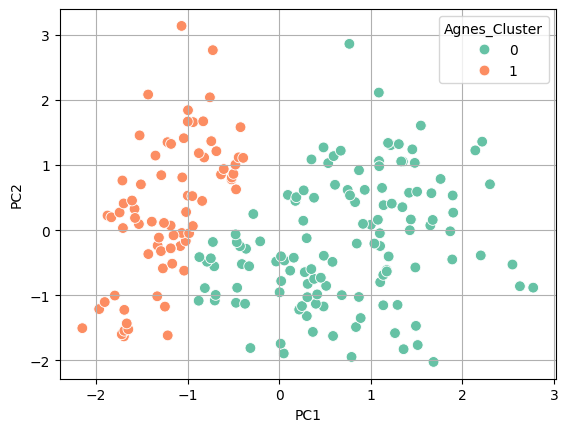

In [70]:
sns.scatterplot(x = 'PC1',y = 'PC2',hue = "Agnes_Cluster",data = df_pca,s=60,palette = 'Set2')
plt.grid(True)
plt.show()

Different algorithms = different perspectives:

KMeans finds compact, equal-sized clusters.

Hierarchical (Agglomerative) groups based on relative distances, which may result in fewer, broader clusters.